Example of Time Series forecasting in Meta stock using ARIMA Model

/var/folders/zf/1_09k_qn25z9x7cbqmt5m_r00000gn/T/ipykernel_30389/1042780259.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("META", start="2016-01-01", end="2022-03-27")
[*********************100%***********************]  1 of 1 completed
/Users/hjh/.virtualenvs/Jupyter_Notebook/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hjh/.virtualenvs/Jupyter_Notebook/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/hjh/.virtualenvs/Jupyter_Notebook/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been pr

Price            Close        High         Low        Open    Volume
Ticker            META        META        META        META      META
Date                                                                
2016-01-04  101.662277  101.682165   99.205753  101.393746  37912400
2016-01-05  102.169495  103.144143  101.115273  102.328618  23258200
2016-01-06  102.408180  103.203811  100.349475  100.578216  25096200
2016-01-07   97.385742  100.876594   96.769130   99.951667  45172900
2016-01-08   96.798958   99.951660   96.500592   99.335040  35402300
...                ...         ...         ...         ...       ...
2022-03-21  210.336090  213.538523  206.497150  213.329662  30142300
2022-03-22  215.467926  218.262607  209.033226  210.216736  31998800
2022-03-23  212.295334  215.617107  211.002424  212.166038  23717300
2022-03-24  218.372009  219.465998  213.618076  213.826936  31502300
2022-03-25  220.609726  224.269640  217.695705  219.306861  40039000

[1569 rows x 5 columns]
Mean Squa

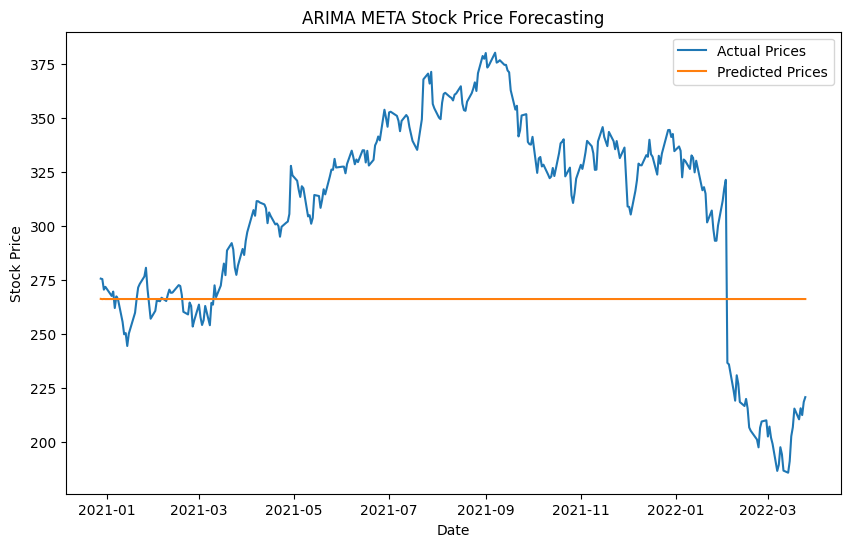

In [88]:
# 라이브러리 임포트
from statsmodels.tsa.arima.model import ARIMA  # ARIMA 모델 라이브러리
from sklearn.metrics import mean_squared_error  # 평균 제곱 오차
import yfinance as yf  # 야후 파이낸스에서 주가 데이터를 가져오는 라이브러리
import matplotlib.pyplot as plt  # 그래프 라이브러리

# 주가 데이터 다운로드 (티커: META)
data = yf.download("META", start="2016-01-01", end="2022-03-27")
print(data)
# 종가만 선택
closing_prices = data["Close"]

# 데이터 분할 (80% 학습=훈련, 20% 테스트)
train_data = closing_prices[:int(0.8 * len(closing_prices))] # 훈련 데이터는 전체 데이터의 80%로 설정
test_data = closing_prices[int(0.8 * len(closing_prices)):]  # 테스트 데이터는 나머지 20%로 설정


# ARIMA 모델 학습
model = ARIMA(train_data, order=(1, 1, 1)) # ARIMA 모델 생성, (p, d, q) 순서 지정
model_fit = model.fit()

# 예측
predictions = model_fit.forecast(steps=len(test_data)) # 테스트 데이터 길이만큼 예측    

# 평균 제곱 오차 계산
mse = mean_squared_error(test_data, predictions) #
print("Mean Squared Error:", mse)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label="Actual Prices")
plt.plot(test_data.index, predictions, label="Predicted Prices")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("ARIMA META Stock Price Forecasting")
plt.show()

In [63]:
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})



✅ 코드 원문

df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})



✅ 문법 해석 + 주석 버전

# ✅ 데이터프레임(data)의 인덱스를 일반 컬럼으로 변환
# 예를 들어 인덱스가 날짜인 경우 'Date'라는 컬럼으로 변환됨
df = data.reset_index()

# ✅ 'Date'와 'Close' 컬럼만 선택하여 새로운 데이터프레임으로 구성
df = df[['Date', 'Close']]

# ✅ Prophet 모델이 요구하는 컬럼명으로 변경
# 'Date' → 'ds'  (Prophet에서 시간 변수로 사용)
# 'Close' → 'y'  (Prophet에서 예측 대상 값으로 사용)
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})



✅ 한 줄로 표현하면

#  풀인덱스를고, Date와 Close 컬럼만 선택한 뒤 Prophet에 맞게 컬럼명을 바꿈
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})




✅ 결과적으로 데이터프레임 구조는 이렇게 변합니다.

ds	y
2022-01-01	72000
2022-01-02	73000
…	…

	•	ds: 날짜 (datetime)
	•	y: 종가 (Close) → 예측 대상 값


✅ 왜 이렇게 쓰나?
	•	Facebook Prophet은 반드시 아래 두 가지 컬럼명을 요구합니다.

컬럼명	의미
ds	날짜 (datetime 타입)
y	예측하고자 하는 값

→ 따라서 Prophet을 쓰기 위한 전처리 과정입니다.



🚀 결론

"reset_index()"는 인덱스를 컬럼으로 풀고, "[['Date', 'Close']]"는 필요한 컬럼만 선택하며, "rename()"은 Prophet이 요구하는 포맷으로 컬럼명을 바꾼다.


In [89]:
print(df)

Price          ds           y
Ticker                   META
0      2016-01-04  101.662277
1      2016-01-05  102.169495
2      2016-01-06  102.408180
3      2016-01-07   97.385742
4      2016-01-08   96.798958
...           ...         ...
1564   2022-03-21  210.336090
1565   2022-03-22  215.467926
1566   2022-03-23  212.295334
1567   2022-03-24  218.372009
1568   2022-03-25  220.609726

[1569 rows x 2 columns]


In [90]:
!pip install pystan==2.19.1.1
!pip install prophet

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached cython-3.1.2-cp39-cp39-macosx_11_0_arm64.whl.metadata (5.9 kB)
Using cached cython-3.1.2-cp39-cp39-macosx_11_0_arm64.whl (2.8 MB)
  DEPRECATION: Building 'pystan' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pystan'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      Cython>=0.22 and NumPy are required.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Fail

In [92]:
from prophet import Prophet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ✅ 데이터 다운로드
data = yf.download('META', start='2016-01-01', end='2022-03-27')

# ✅ 인덱스를 컬럼으로 변환하고 필요한 컬럼만 선택
df = data.reset_index()[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
print(df)
# ✅ 결측치 처리
df = df.dropna(subset=['y'])
df['y'] = pd.to_numeric(df['y'], errors='coerce')
df = df.dropna(subset=['y'])

# ✅ Prophet 모델 생성 및 학습
model = Prophet()
model.fit(df)

# ✅ 미래 데이터프레임 생성 (365일 예측)
future = model.make_future_dataframe(periods=365)

# ✅ 예측
forecast = model.predict(future)

# ✅ 그래프 출력
fig = model.plot(forecast)
plt.show()

/var/folders/zf/1_09k_qn25z9x7cbqmt5m_r00000gn/T/ipykernel_30389/1050853639.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('META', start='2016-01-01', end='2022-03-27')
[*********************100%***********************]  1 of 1 completed

Price          ds           y
Ticker                   META
0      2016-01-04  101.662277
1      2016-01-05  102.169495
2      2016-01-06  102.408180
3      2016-01-07   97.385742
4      2016-01-08   96.798958
...           ...         ...
1564   2022-03-21  210.336090
1565   2022-03-22  215.467926
1566   2022-03-23  212.295334
1567   2022-03-24  218.372009
1568   2022-03-25  220.609726

[1569 rows x 2 columns]


KeyError: ['y']

In [94]:
import pandas as pd
import yfinance as yf
from prophet import Prophet
import matplotlib.pyplot as plt

# ✅ 1. 데이터 다운로드 (예: 삼성전자)
ticker = '005930.KS'
data = yf.download(ticker, start='2015-01-01', end='2024-12-31')

# ✅ 2. 데이터 처리 및 검증
if data.empty:
    print(f"'{ticker}' 데이터를 다운로드하지 못했습니다. 티커 이름이나 인터넷 연결을 확인하세요.")
else:
    # 2-1. Prophet 포맷에 맞게 데이터프레임 준비
    df = data.reset_index()[['Date', 'Close']]  # 'Date'와 'Close' 컬럼만 선택
    df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True) # 컬럼 이름을 'ds', 'y'로 변경

    # 2-2. 결측치 제거 (이 단계에서 KeyErorr 발생)
    df.dropna(subset=['y'], inplace=True)

    print("데이터 처리 후 컬럼 확인:", df.columns) # 디버깅용: 컬럼 이름이 올바른지 확인
    print(df.head()) # 디버깅용: 데이터가 올바른지 확인

    # ✅ 3. Prophet 모델 생성 및 학습
    model = Prophet(daily_seasonality=True, seasonality_mode='multiplicative')
    model.fit(df)

    # ✅ 4. 미래 예측
    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)

    # ✅ 5. 결과 시각화
    print("주가 예측 결과를 시각화합니다.")
    fig1 = model.plot(forecast)
    plt.title(f'{ticker} Stock Price Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price (KRW)')
    plt.grid(True)
    plt.show()

    fig2 = model.plot_components(forecast)
    plt.show()

/var/folders/zf/1_09k_qn25z9x7cbqmt5m_r00000gn/T/ipykernel_30389/40534289.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


KeyError: ['y']

In [95]:
import pandas as pd  # 데이터프레임 처리용 라이브러리
import numpy as np  # 수치 계산용 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화 라이브러리
from statsmodels.tsa.arima.model import ARIMA  # ARIMA 모델 라이브러리
from sklearn.metrics import mean_squared_error  # 모델 성능 평가용 (평균 제곱 오차)
import yfinance as yf  # 야후 파이낸스에서 주가 데이터를 가져오는 라이브러리

# 주가 데이터 다운로드 (티커: META, 메타 플랫폼스)
data = yf.download("META", start="2016-01-01", end="2022-03-27")
print(data)

/var/folders/zf/1_09k_qn25z9x7cbqmt5m_r00000gn/T/ipykernel_30389/2849960275.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("META", start="2016-01-01", end="2022-03-27")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            META        META        META        META      META
Date                                                                
2016-01-04  101.662277  101.682165   99.205753  101.393746  37912400
2016-01-05  102.169495  103.144143  101.115273  102.328618  23258200
2016-01-06  102.408180  103.203811  100.349475  100.578216  25096200
2016-01-07   97.385742  100.876594   96.769130   99.951667  45172900
2016-01-08   96.798958   99.951660   96.500592   99.335040  35402300
...                ...         ...         ...         ...       ...
2022-03-21  210.336090  213.538523  206.497150  213.329662  30142300
2022-03-22  215.467926  218.262607  209.033226  210.216736  31998800
2022-03-23  212.295334  215.617107  211.002424  212.166038  23717300
2022-03-24  218.372009  219.465998  213.618076  213.826936  31502300
2022-03-25  220.609726  224.269640  217.695705  219.306861  40039000

[1569 rows x 5 columns]



**Example of using Random Forests to determine price movement**

In [96]:

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Download historical stock data
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2010-01-01', end='2021-09-30')
print(stock_data)


# Compute technical indicators for trading signals
stock_data['SMA'] = stock_data['Close'].rolling(window=14).mean()
stock_data['EMA'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data.dropna(inplace=True)

# Define target variable (price increase or decrease)
stock_data['Target'] = np.where(stock_data['Close'].shift(-1) > stock_data['Close'], 1, 0)

# Prepare data for training and testing
X = stock_data[['SMA', 'EMA']]
y = stock_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of the Random Forest model: {accuracy:.2f}')

/var/folders/zf/1_09k_qn25z9x7cbqmt5m_r00000gn/T/ipykernel_30389/2966431520.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start='2010-01-01', end='2021-09-30')
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2010-01-04    6.431897    6.446624    6.382909    6.414466  493729600
2010-01-05    6.443016    6.479382    6.409054    6.449628  601904800
2010-01-06    6.340531    6.468562    6.333919    6.443016  552160000
2010-01-07    6.328812    6.371489    6.282829    6.363975  477131200
2010-01-08    6.370888    6.371490    6.283131    6.320397  447610800
...                ...         ...         ...         ...        ...
2021-09-23  143.905914  144.150936  142.739611  143.729491   64838200
2021-09-24  143.994095  144.533145  142.661179  142.759193   53477900
2021-09-27  142.474960  143.053222  140.955840  142.572975   74150700
2021-09-28  139.083908  141.867347  138.868288  140.397219  108972300
2021-09-29  139.985596  141.573329  139.201524  139.632764   74602000

[2956 rows x 5 colu

# ✅ 단순 이동 평균 (SMA) 계산
# 최근 14일간 종가의 단순 평균을 계산하여 'SMA' 컬럼에 저장
stock_data['SMA'] = stock_data['Close'].rolling(window=14).mean()

# ✅ 지수 이동 평균 (EMA) 계산
# 최근 14일 동안의 지수 가중 이동 평균을 'EMA' 컬럼에 저장
# 최근 가격에 더 높은 가중치를 부여
stock_data['EMA'] = stock_data['Close'].ewm(span=14, adjust=False).mean()

# ✅ 결측치 제거
# 이동 평균 계산 초기에 데이터 부족으로 발생하는 NaN 값 제거
stock_data.dropna(inplace=True)

# ✅ 타깃 변수 생성 (다음 날 가격 상승 여부)
# 다음 날의 종가가 오늘보다 크면 1 (상승), 그렇지 않으면 0 (하락 또는 동일)
stock_data['Target'] = np.where(
    stock_data['Close'].shift(-1) > stock_data['Close'],  # 조건: 다음 날 종가 > 오늘 종가
    1,   # 조건이 참이면 → 상승 (1)
    0    # 조건이 거짓이면 → 하락 또는 동일 (0)
)

In [97]:
!pip install nltk gensim
!python -m pip install --upgrade pip

**Example of using Topic Modeling**

In [98]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Sample financial news headlines
headlines = [
    "Company X reports better-than-expected earnings for Q3",
    "Company Y struggles with supply chain issues amid global crisis",
    "Company Z announces a major acquisition to expand market share",
]

# Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Tokenize and preprocess the headlines
tokenized_headlines = [preprocess(headline) for headline in headlines]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_headlines)
corpus = [dictionary.doc2bow(headline) for headline in tokenized_headlines]

# Train LDA model
num_topics = 2
lda_model = models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20)

# Print topics
topics = lda_model.print_topics()
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to /Users/hjh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hjh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hjh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/hjh/nltk_data'
    - '/Users/hjh/.virtualenvs/Jupyter_Notebook/nltk_data'
    - '/Users/hjh/.virtualenvs/Jupyter_Notebook/share/nltk_data'
    - '/Users/hjh/.virtualenvs/Jupyter_Notebook/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [73]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
import ssl # Import the ssl module

# This block attempts to create an unverified SSL context for NLTK downloads
# if certificate verification fails. This is a common workaround for
# CERTIFICATE_VERIFY_FAILED errors during NLTK data downloads.
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't have _create_unverified_context
    pass
else:
    # Handle target environment that doesn't have certificate validation
    ssl._create_default_https_context = _create_unverified_https_context

# Download NLTK data. Wrapped in try-except to handle potential download errors.
# We check if the data is already available before attempting to download.
print("Checking and downloading NLTK data...")
try:
    nltk.data.find('corpora/stopwords')
except nltk.downloader.DownloadError:
    print("Downloading 'stopwords'...")
    try:
        nltk.download('stopwords')
    except Exception as e:
        print(f"Error downloading stopwords: {e}")
        print("Please ensure your internet connection is stable and try again. If SSL issues persist, a system-level certificate update might be required.")

try:
    nltk.data.find('corpora/wordnet')
except nltk.downloader.DownloadError:
    print("Downloading 'wordnet'...")
    try:
        nltk.download('wordnet')
    except Exception as e:
        print(f"Error downloading wordnet: {e}")
        print("Please ensure your internet connection is stable and try again. If SSL issues persist, a system-level certificate update might be required.")

try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    print("Downloading 'punkt'...")
    try:
        nltk.download('punkt')
    except Exception as e:
        print(f"Error downloading punkt: {e}")
        print("Please ensure your internet connection is stable and try again. If SSL issues persist, a system-level certificate update might be required.")

print("NLTK data download check complete.")


# Sample financial news headlines
headlines = [
    "Company X reports better-than-expected earnings for Q3",
    "Company Y struggles with supply chain issues amid global crisis",
    "Company Z announces a major acquisition to expand market share",
]

# Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    """
    Cleans and tokenizes text: lowercases, tokenizes, lemmatizes,
    removes non-alphabetic tokens and stopwords.
    """
    tokens = nltk.word_tokenize(text.lower())
    # Filter out non-alphabetic tokens and lemmatize
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Tokenize and preprocess the headlines
tokenized_headlines = [preprocess(headline) for headline in headlines]
print("\nTokenized Headlines:", tokenized_headlines)

# Create a dictionary and corpus for LDA
# A dictionary maps each word to a unique ID
dictionary = corpora.Dictionary(tokenized_headlines)
print("Dictionary:", dictionary.token2id)

# A corpus is a Bag-of-Words representation of the documents
corpus = [dictionary.doc2bow(headline) for headline in tokenized_headlines]
print("Corpus (BoW):", corpus)

# Train LDA model
# num_topics: The number of latent topics to extract
# id2word: The mapping from word IDs back to words for human readability
# passes: The number of passes through the corpus during training
num_topics = 2
lda_model = models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20, random_state=42)

print("\n--- Discovered Topics ---")
# Print the topics with their associated keywords and their weights
for idx, topic in lda_model.print_topics(num_words=5): # Show top 5 words per topic
    print(f"Topic #{idx}: {topic}")

print("\n--- Topic Distribution per Document ---")
# Show which topics are most prominent in each original headline
for i, headline_bow in enumerate(corpus):
    # Get the topic distribution for the current document
    doc_topics = lda_model.get_document_topics(headline_bow)
    # Sort by probability in descending order
    doc_topics_sorted = sorted(doc_topics, key=lambda x: x[1], reverse=True)

    original_headline = headlines[i]
    print(f"Headline: \"{original_headline}\"")
    for topic_id, prob in doc_topics_sorted:
        # Get the words for the current topic from the model
        topic_words = lda_model.show_topic(topic_id, topn=3) # Get top 3 words for clarity
        words_only = [word for word, _ in topic_words]
        print(f"  Topic {topic_id} (Probability: {prob:.3f}): {', '.join(words_only)}")
    print("-" * 30)


Checking and downloading NLTK data...


AttributeError: module 'nltk.downloader' has no attribute 'DownloadError'

In [74]:
import numpy as np
from scipy.stats import norm

# ✅ 포트폴리오 가치
portfolio_value = 1_000_000  # 100만원

# ✅ 수익률 평균과 표준편차 (예시 값)
mu = 0.001   # 평균 일일 수익률 0.1%
sigma = 0.02 # 일일 수익률 변동성 2%

# ✅ 신뢰수준 95%에서의 Z값 (정규분포)
z = norm.ppf(0.95)  # 약 1.645

# ✅ VaR 계산 (1일 기준)
VaR = portfolio_value * (-(mu - z * sigma))

# ✅ 결과 출력
print(f"1일 VaR (95%): {VaR:,.0f} 원")

1일 VaR (95%): 31,897 원


In [75]:
!python --version

Python 3.9.10


In [76]:
!pip install gym

In [79]:
import gym
import numpy as np
from gym import spaces
import matplotlib.pyplot as plt

# ✅ 간단한 주식 거래 환경 정의
class StockTradingEnv(gym.Env):
    def __init__(self, prices):
        super(StockTradingEnv, self).__init__()

        # 주가 데이터 입력
        self.prices = prices

        # 현재 스텝 (시간)
        self.current_step = 0

        # 초기 자본금
        self.cash = 1000000

        # 현재 보유 주식 수
        self.shares_held = 0

        # 총 자산 (현금 + 주식 평가금액)
        self.total_asset = self.cash

        # ✅ 행동 공간: 0=매도, 1=보유, 2=매수 (Discrete: 유한한 선택지)
        self.action_space = spaces.Discrete(3)

        # ✅ 상태 공간: [현재 주가, 보유 주식 수, 현금]
        self.observation_space = spaces.Box(
            low=0, 
            high=np.inf, 
            shape=(3,), 
            dtype=np.float32
        )

    def reset(self):
        # ✅ 환경 초기화
        self.current_step = 0
        self.cash = 1000000
        self.shares_held = 0
        self.total_asset = self.cash
        return self._get_obs()

    def _get_obs(self):
        # ✅ 현재 상태 반환: [현재 주가, 보유 주식 수, 현금]
        price = self.prices[self.current_step]
        return np.array([price, self.shares_held, self.cash], dtype=np.float32)

    def step(self, action):
        # ✅ 현재 주가
        price = self.prices[self.current_step]

        done = False

        # ✅ 행동 처리
        if action == 0:  # 매도
            self.cash += self.shares_held * price  # 주식 전량 매도 → 현금화
            self.shares_held = 0

        elif action == 2:  # 매수
            num_shares = self.cash // price        # 살 수 있는 최대 주식 수
            self.cash -= num_shares * price        # 현금 차감
            self.shares_held += num_shares         # 보유 주식 수 증가

        # ✅ 다음 스텝으로 이동
        self.current_step += 1

        # ✅ 종료 조건: 마지막 데이터 도달 시
        if self.current_step >= len(self.prices) - 1:
            done = True

        # ✅ 총 자산 계산: 현금 + 보유 주식 평가금액
        next_price = self.prices[self.current_step]
        self.total_asset = self.cash + self.shares_held * next_price

        # ✅ 보상: 현재 총 자산
        reward = self.total_asset

        return self._get_obs(), reward, done, {}

# ✅ 샘플 가격 데이터 (삼성전자 일부 종가 예시)
prices = np.array(
    [72000, 73000, 74000, 75000, 74500, 75500, 76000, 77000, 76500, 77500], 
    dtype=np.float32
)

# ✅ 환경 인스턴스 생성
env = StockTradingEnv(prices)

# ✅ 환경 초기화
obs = env.reset()

# ✅ 결과 저장 리스트
trajectory = []

# ✅ 시뮬레이션 실행 (랜덤 행동)
for t in range(len(prices)-1):
    action = env.action_space.sample()  # 랜덤으로 행동 선택 (매도/보유/매수)
    next_obs, reward, done, _ = env.step(action)  # 행동 수행

    # 결과 저장
    trajectory.append((t, obs, action, reward)) # “trajectory” = 경로, 궤적, 이동 경로 라는 뜻입니다.
	                                            # 강화학습에서는 **“에이전트가 환경에서 움직이며 경험한 상태, 행동, 보상, 시간의 순서”**를 의미

    # 상태 업데이트
    obs = next_obs

    # 종료 시 반복 중단
    if done:
        break

# ✅ 시뮬레이션 결과 출력
for t, state, action, reward in trajectory:
    print(f"[{t}일차] 주가={state[0]}, "
          f"행동={'매도' if action==0 else '보유' if action==1 else '매수'}, "
          f"총자산={reward:,.0f}원")

[0일차] 주가=72000.0, 행동=보유, 총자산=1,000,000원
[1일차] 주가=73000.0, 행동=보유, 총자산=1,000,000원
[2일차] 주가=74000.0, 행동=매수, 총자산=1,013,000원
[3일차] 주가=75000.0, 행동=매도, 총자산=1,013,000원
[4일차] 주가=74500.0, 행동=보유, 총자산=1,013,000원
[5일차] 주가=75500.0, 행동=보유, 총자산=1,013,000원
[6일차] 주가=76000.0, 행동=매수, 총자산=1,026,000원
[7일차] 주가=77000.0, 행동=보유, 총자산=1,019,500원
[8일차] 주가=76500.0, 행동=보유, 총자산=1,032,500원


이 부분은 주식 거래 시뮬레이션에서 매우 중요한 종료 조건

✅ 문법 해석

if self.current_step >= len(self.prices) - 1:
    done = True

🔸 뜻:
	•	현재 시점(self.current_step)이 가격 데이터(prices)의 마지막 날짜에 도달했으면, 에피소드를 종료해라.

✅ 쉽게 풀어쓰면
	•	가격 데이터의 길이가 예를 들어 len(self.prices) = 10이라면,
	•	인덱스는 0 ~ 9까지 존재합니다.
→ 즉, 마지막 인덱스는 len(self.prices) - 1 → 9입니다.

✔️ 조건:
	•	self.current_step >= 9
→ 현재 날짜가 마지막 날이면

✔️ 결과:
	•	done = True
→ 거래 시뮬레이션 종료 신호를 강화학습 알고리즘에 보냅니다.



✅ 동작 흐름 예시

current_step	의미	done
0	           1일차	False
…	           …	   False
8	           9일차	False
9	          마지막 날	✅ True (종료)

→ 마지막 날 도달 → 에피소드 종료


✅ 왜 필요한가?
	•	강화학습 환경은 step() 함수가 반복 호출됩니다.
	•	데이터가 끝났을 때 done = True를 보내야
→ 알고리즘이 **“이번 시뮬레이션은 끝났다”**는 것을 알 수 있습니다.


✅ 코드 문맥 속 해석

def step(self, action):
    ...
    self.current_step += 1
    if self.current_step >= len(self.prices) - 1:
        done = True  # 👉 데이터 끝 → 종료
    else:
        done = False # 👉 계속 진행

✅ 요약 한 줄

“현재 날짜가 데이터의 마지막 날에 도달했으면 시뮬레이션을 종료해라.”

이 부분이 핵심 중의 핵심

In [81]:

✅ 결론적으로 현재 모델 상태는?

✔️ ✅ 잘 되는 부분:
	•	정책 변화량 (approx_kl)이 매우 작음 → PPO clip 안정성 유지
	•	정책 손실 (policy_gradient_loss)도 안정적 → 극단적인 행동 변화는 없음
	•	빠른 학습 속도 (fps 3500~3900)

❌ 문제점:
	•	explained_variance = 0 → 가치 함수가 전혀 성능을 못 내고 있음
→ 보상 예측이 매우 부정확
	•	value_loss가 매우 큼 → 가치 함수가 상태의 가치를 잘 추정하지 못하고 있음
	•	clip_fraction = 0 → 정책 업데이트가 너무 적거나 거의 변화 없음 → 과도하게 보수적일 수 있음
	•	데이터셋이 너무 작음 (20개 데이터) → 학습할 패턴이 부족

⸻

✅ 왜 이런 현상이 발생했나?

🔸 원인
	1.	데이터 부족: 20개 정도의 가격 데이터는 RL 학습에 매우 부족합니다.
→ 더 긴 기간(수백~수천 데이터) 필요
	2.	보상 구조 문제:
현재는 단순히 총자산 - 초기자본만 보상으로 설정함
→ 수익률이 아닌 절대 금액 변화라서 학습이 어려움
	3.	상태 공간이 너무 단순:

	•	주가, 보유 주식 수, 현금 외에
→ RSI, EMA, MACD 같은 기술 지표 추가 필요

SyntaxError: invalid character '✔' (U+2714) (1734612854.py, line 3)

In [83]:
!pip install stable-baselines3 gymnasium

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 19       |
|    ep_rew_mean     | 7.88e+05 |
| time/              |          |
|    fps             | 6380     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 19            |
|    ep_rew_mean          | 7.55e+05      |
| time/                   |               |
|    fps                  | 4155          |
|    iterations           | 2             |
|    time_elapsed         | 0             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 5.5037963e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2       

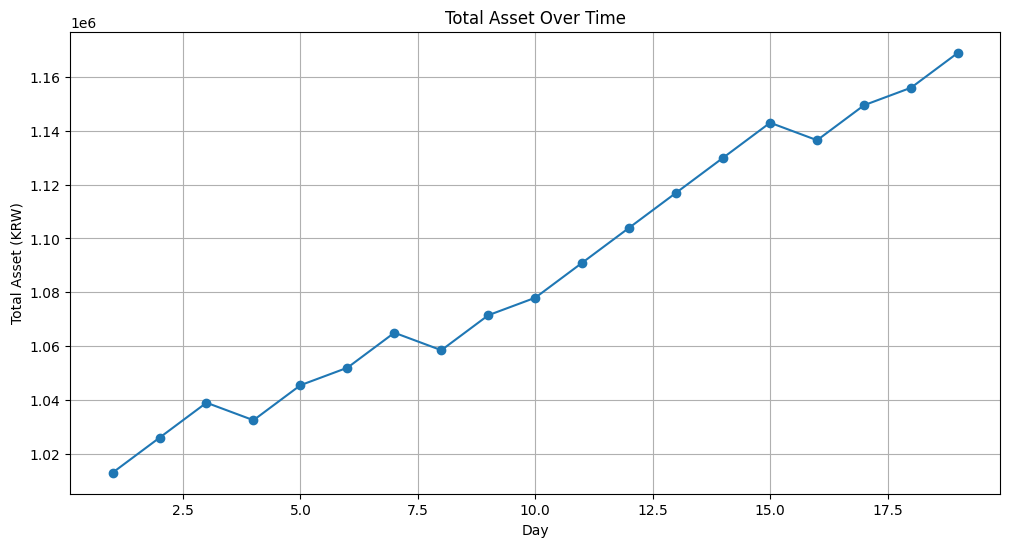

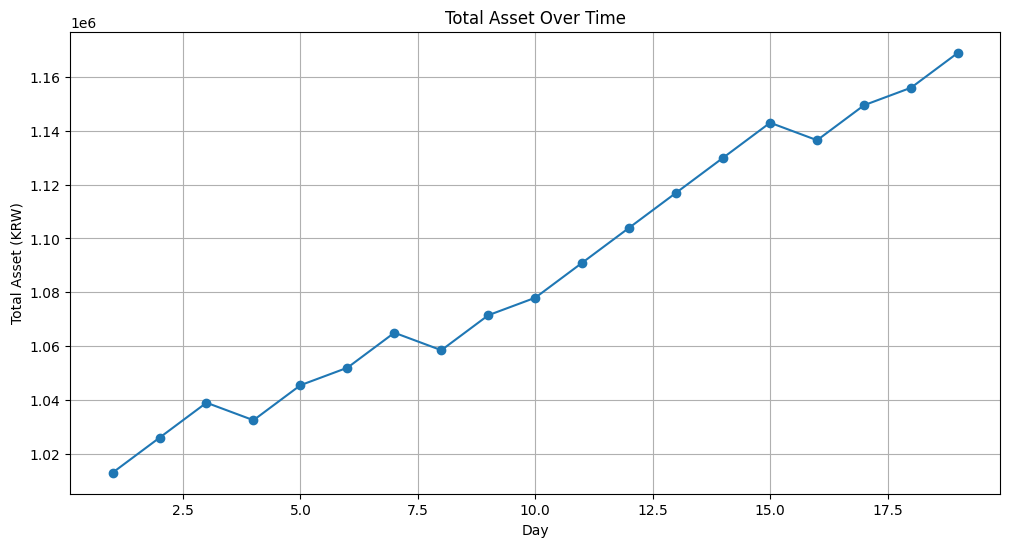

In [84]:
import gymnasium as gym
import numpy as np
from gymnasium import spaces
import matplotlib.pyplot as plt

from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

# ✅ 주식 거래 환경 정의
class StockTradingEnv(gym.Env):
    def __init__(self, prices):
        super(StockTradingEnv, self).__init__()

        self.prices = prices
        self.current_step = 0
        self.cash = 1000000  # 초기 자본
        self.shares_held = 0
        self.total_asset = self.cash

        # 행동 공간 (0 = 매도, 1 = 보유, 2 = 매수)
        self.action_space = spaces.Discrete(3)

        # 상태 공간 (현재 주가, 보유 주식 수, 현금)
        self.observation_space = spaces.Box(
            low=0, high=np.inf, shape=(3,), dtype=np.float32
        )

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)

        self.current_step = 0
        self.cash = 1000000
        self.shares_held = 0
        self.total_asset = self.cash

        return self._get_obs(), {}

    def _get_obs(self):
        price = self.prices[self.current_step]
        return np.array([price, self.shares_held, self.cash], dtype=np.float32)

    def step(self, action):
        price = self.prices[self.current_step]
        done = False

        # 행동 처리
        if action == 0:  # 매도
            self.cash += self.shares_held * price
            self.shares_held = 0

        elif action == 2:  # 매수
            num_shares = self.cash // price
            self.cash -= num_shares * price
            self.shares_held += num_shares

        # 다음 스텝으로 이동
        self.current_step += 1
        if self.current_step >= len(self.prices) - 1:
            done = True

        next_price = self.prices[self.current_step]
        self.total_asset = self.cash + self.shares_held * next_price

        # 보상: 자산의 변화량
        reward = self.total_asset - 1000000  # 초기 자본 대비 증가분

        terminated = done
        truncated = False  # 에피소드 강제 종료 조건 없음

        return self._get_obs(), reward, terminated, truncated, {}

# ✅ 가격 데이터 (예시)
prices = np.array(
    [72000, 73000, 74000, 75000, 74500, 75500, 76000, 77000, 
     76500, 77500, 78000, 79000, 80000, 81000, 82000, 83000, 
     82500, 83500, 84000, 85000], dtype=np.float32
)

# ✅ 환경 생성 및 체크
env = StockTradingEnv(prices)
check_env(env)

# ✅ PPO 모델 생성 및 학습
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# ✅ 테스트 시뮬레이션
obs, _ = env.reset()
trajectory = []

for _ in range(len(prices) - 1):
    action, _states = model.predict(obs, deterministic=True)  # 학습된 정책 사용
    obs, reward, terminated, truncated, _ = env.step(action)
    trajectory.append((env.current_step, env.prices[env.current_step-1], action, env.total_asset))

    if terminated or truncated:
        break

# ✅ 결과 출력
for step, price, action, asset in trajectory:
    print(f"[{step}일차] 주가={price:,.0f}원, "
          f"행동={'매도' if action==0 else '보유' if action==1 else '매수'}, "
          f"총자산={asset:,.0f}원")

# ✅ 시각화import gymnasium as gym
import numpy as np
from gymnasium import spaces
import matplotlib.pyplot as plt

from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

# ✅ 주식 거래 환경 정의
class StockTradingEnv(gym.Env):
    def __init__(self, prices):
        super(StockTradingEnv, self).__init__()

        self.prices = prices
        self.current_step = 0
        self.cash = 1000000  # 초기 자본
        self.shares_held = 0
        self.total_asset = self.cash

        # 행동 공간 (0 = 매도, 1 = 보유, 2 = 매수)
        self.action_space = spaces.Discrete(3)

        # 상태 공간 (현재 주가, 보유 주식 수, 현금)
        self.observation_space = spaces.Box(
            low=0, high=np.inf, shape=(3,), dtype=np.float32
        )

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)

        self.current_step = 0
        self.cash = 1000000
        self.shares_held = 0
        self.total_asset = self.cash

        return self._get_obs(), {}

    def _get_obs(self):
        price = self.prices[self.current_step]
        return np.array([price, self.shares_held, self.cash], dtype=np.float32)

    def step(self, action):
        price = self.prices[self.current_step]
        done = False

        # 행동 처리
        if action == 0:  # 매도
            self.cash += self.shares_held * price
            self.shares_held = 0

        elif action == 2:  # 매수
            num_shares = self.cash // price
            self.cash -= num_shares * price
            self.shares_held += num_shares

        # 다음 스텝으로 이동
        self.current_step += 1
        if self.current_step >= len(self.prices) - 1:
            done = True

        next_price = self.prices[self.current_step]
        self.total_asset = self.cash + self.shares_held * next_price

        # 보상: 자산의 변화량
        reward = self.total_asset - 1000000  # 초기 자본 대비 증가분

        terminated = done
        truncated = False  # 에피소드 강제 종료 조건 없음

        return self._get_obs(), reward, terminated, truncated, {}

# ✅ 가격 데이터 (예시)
prices = np.array(
    [72000, 73000, 74000, 75000, 74500, 75500, 76000, 77000, 
     76500, 77500, 78000, 79000, 80000, 81000, 82000, 83000, 
     82500, 83500, 84000, 85000], dtype=np.float32
)

# ✅ 환경 생성 및 체크
env = StockTradingEnv(prices)
check_env(env)

# ✅ PPO 모델 생성 및 학습
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

# ✅ 테스트 시뮬레이션
obs, _ = env.reset()
trajectory = []

for _ in range(len(prices) - 1):
    action, _states = model.predict(obs, deterministic=True)  # 학습된 정책 사용
    obs, reward, terminated, truncated, _ = env.step(action)
    trajectory.append((env.current_step, env.prices[env.current_step-1], action, env.total_asset))

    if terminated or truncated:
        break

# ✅ 결과 출력
for step, price, action, asset in trajectory:
    print(f"[{step}일차] 주가={price:,.0f}원, "
          f"행동={'매도' if action==0 else '보유' if action==1 else '매수'}, "
          f"총자산={asset:,.0f}원")

# ✅ 시각화
dates = [t[0] for t in trajectory]
assets = [t[3] for t in trajectory]

plt.figure(figsize=(12,6))
plt.plot(dates, assets, marker='o')
plt.title('Total Asset Over Time')
plt.xlabel('Day')
plt.ylabel('Total Asset (KRW)')
plt.grid()
plt.show()
dates = [t[0] for t in trajectory]
assets = [t[3] for t in trajectory]

plt.figure(figsize=(12,6))
plt.plot(dates, assets, marker='o')
plt.title('Total Asset Over Time')
plt.xlabel('Day')
plt.ylabel('Total Asset (KRW)')
plt.grid()
plt.show()


dates = [t[0] for t in trajectory]
assets = [t[3] for t in trajectory]

에 대한 문법 해석과 주석을 상세히 설명드리겠습니다.


✅ 문법 해석

✔️ 리스트 컴프리헨션(List Comprehension) 문법

dates = [t[0] for t in trajectory]
assets = [t[3] for t in trajectory]

요소	의미
t	trajectory 리스트 내의 각 튜플 하나씩
t[0]	튜플의 첫 번째 항목 (현재 스텝 또는 날짜)
t[3]	튜플의 네 번째 항목 (현재 총자산)

→ 쉽게 풀면:
	•	trajectory 안에 있는 각 거래 기록에서
	•	dates는 스텝 번호(날짜)를 뽑아낸 리스트
	•	assets는 총자산 값을 뽑아낸 리스트


✅ trajectory 내부 구조 복습

trajectory.append(
    (current_step, price, action, total_asset)
)

인덱스	값	의미
t[0]	current_step	현재 날짜 (스텝)
t[1]	price	현재 주가
t[2]	action	행동 (매도/보유/매수)
t[3]	total_asset	총자산


✅ 주석 버전 코드

# ✅ 시각화를 위한 날짜(스텝) 리스트 생성
# trajectory에서 각 튜플의 첫 번째 요소 (current_step)를 추출
dates = [t[0] for t in trajectory]

# ✅ 시각화를 위한 자산 리스트 생성
# trajectory에서 각 튜플의 네 번째 요소 (총자산)를 추출
assets = [t[3] for t in trajectory]



✅ 결과 예시

dates = [1, 2, 3, 4, 5, ...]    # 스텝(날짜)
assets = [1012000, 1025000, ...]  # 각 날짜의 총자산



✅ 시각화 코드와 연결

plt.figure(figsize=(12,6))
plt.plot(dates, assets, marker='o')
plt.title('Total Asset Over Time')
plt.xlabel('Day')
plt.ylabel('Total Asset (KRW)')
plt.grid()
plt.show()

→ 날짜별로 총자산의 변화 그래프가 출력됩니다.


✅ 리스트 컴프리헨션 구조 문법 공식

[원하는_값 for 변수 in 리스트]

예시:

nums = [1, 2, 3, 4, 5]
squared = [x**2 for x in nums]
# → [1, 4, 9, 16, 25]

→ trajectory에서 특정 값만 추출하는 것도 동일한 원리입니다.


✅ 한 줄 요약

dates는 날짜 스텝 리스트, assets는 날짜별 총자산 리스트를 의미하며, 시각화 및 분석을 위한 데이터입니다.


완전한 실전용 주식 트레이딩 PPO 강화학습 전체 코드

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 489      |
|    ep_rew_mean     | -0.192   |
| time/              |          |
|    fps             | 4609     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 489         |
|    ep_rew_mean          | -0.173      |
| time/                   |             |
|    fps                  | 3544        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011428414 |
|    clip_fraction        | 0.078       |
|    clip_range           | 0.2         |
|    entropy_loss   

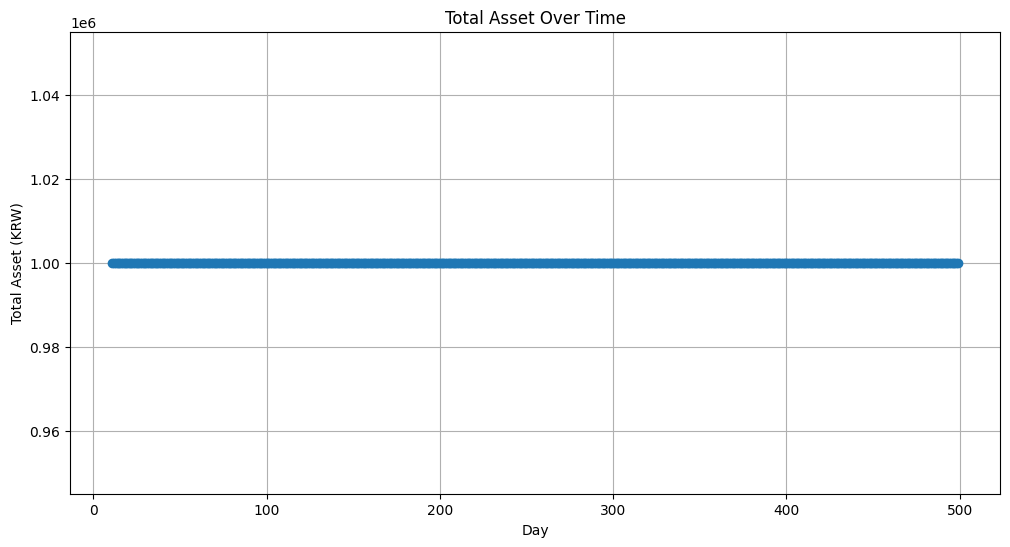

In [86]:
import gymnasium as gym
import numpy as np
from gymnasium import spaces
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.env_checker import check_env

# ✅ 주식 트레이딩 환경 클래스
class StockTradingEnv(gym.Env):
    def __init__(self, prices):
        super(StockTradingEnv, self).__init__()

        self.prices = prices
        self.current_step = 10  # SMA 계산을 위해 초기값 10
        self.cash = 1000000
        self.shares_held = 0
        self.total_asset = self.cash
        self.prev_total_asset = self.cash

        # ✅ 행동 공간: 매도(0), 보유(1), 매수(2)
        self.action_space = spaces.Discrete(3)

        # ✅ 상태 공간: [현재 주가, 보유 주식 수, 현금, SMA(5), SMA(10)]
        self.observation_space = spaces.Box(
            low=0, high=np.inf, shape=(5,), dtype=np.float32
        )

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.current_step = 10
        self.cash = 1000000
        self.shares_held = 0
        self.total_asset = self.cash
        self.prev_total_asset = self.cash
        return self._get_obs(), {}

    def _get_obs(self):
        price = self.prices[self.current_step]
        sma5 = np.mean(self.prices[self.current_step-5:self.current_step])
        sma10 = np.mean(self.prices[self.current_step-10:self.current_step])
        return np.array([price, self.shares_held, self.cash, sma5, sma10], dtype=np.float32)

    def step(self, action):
        price = self.prices[self.current_step]
        fee = 0.001  # 거래 수수료 (0.1%)

        # ✅ 행동 수행
        if action == 0:  # 매도
            self.cash += self.shares_held * price * (1 - fee)
            self.shares_held = 0

        elif action == 2:  # 매수
            num_shares = self.cash // (price * (1 + fee))
            self.cash -= num_shares * price * (1 + fee)
            self.shares_held += num_shares

        # ✅ 다음 스텝으로 이동
        self.current_step += 1

        # ✅ 종료 조건 확인
        done = self.current_step >= len(self.prices) - 1

        # ✅ 다음 주가
        next_price = self.prices[self.current_step]

        # ✅ 총 자산 계산
        self.total_asset = self.cash + self.shares_held * next_price

        # ✅ 보상: 자산 증분 비율
        reward = (self.total_asset - self.prev_total_asset) / self.prev_total_asset
        self.prev_total_asset = self.total_asset

        # ✅ 상태, 보상, 종료여부 반환
        terminated = done
        truncated = False
        return self._get_obs(), reward, terminated, truncated, {}

# ✅ 가격 데이터 생성 (500일)
np.random.seed(42)
prices = np.cumsum(np.random.normal(0, 500, 500)) + 75000
prices = np.maximum(prices, 1000).astype(np.float32)  # 주가는 음수가 될 수 없음

# ✅ 환경 생성 및 검증
env = StockTradingEnv(prices)
check_env(env)

# ✅ PPO 모델 생성 및 학습
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=100000)

# ✅ 테스트 시뮬레이션 실행
obs, _ = env.reset()
trajectory = []

for _ in range(len(prices) - 11):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, _ = env.step(action)
    trajectory.append((env.current_step, env.prices[env.current_step-1], action, env.total_asset))
    if terminated or truncated:
        break

# ✅ 결과 출력
for step, price, action, asset in trajectory:
    print(f"[{step}일차] 주가={price:,.0f}원, "
          f"행동={'매도' if action==0 else '보유' if action==1 else '매수'}, "
          f"총자산={asset:,.0f}원")

# ✅ 자산 변화 시각화
dates = [t[0] for t in trajectory]
assets = [t[3] for t in trajectory]

plt.figure(figsize=(12,6))
plt.plot(dates, assets, marker='o')
plt.title('Total Asset Over Time')
plt.xlabel('Day')
plt.ylabel('Total Asset (KRW)')
plt.grid()
plt.show()